# DATA CLEANING: CRIME RATES IN NYC

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

df = pd.read_csv('data/nyc_crime.csv')

### Clean data
- Select the columns needed for the analysis
- Rename the columns
- Fill in the NaN values on columns that is needed for plotting variables
- Convert all the date columns to datetime format. (I am still thinking of combining the date and time but I need to check what I can do to plot it.)
- Check for duplicates. check for columns .nunique() for columns for unique values
- Separate the date and add another columns for years, months and dates

###  Select only necessary column
Columns that are needed are:'CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'

In [2]:
df = df[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM','CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'PREM_TYP_DESC', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 20 columns):
CMPLNT_NUM          460745 non-null int64
ADDR_PCT_CD         460745 non-null int64
BORO_NM             460430 non-null object
CMPLNT_FR_DT        460745 non-null object
CMPLNT_FR_TM        460745 non-null object
CRM_ATPT_CPTD_CD    460745 non-null object
LAW_CAT_CD          460745 non-null object
PREM_TYP_DESC       458891 non-null object
OFNS_DESC           460733 non-null object
SUSP_AGE_GROUP      351565 non-null object
SUSP_RACE           351550 non-null object
SUSP_SEX            351550 non-null object
VIC_AGE_GROUP       460745 non-null object
VIC_RACE            460742 non-null object
VIC_SEX             460742 non-null object
X_COORD_CD          460745 non-null int64
Y_COORD_CD          460745 non-null int64
Latitude            460745 non-null float64
Longitude           460745 non-null float64
Lat_Lon             460745 non-null object
dtypes: float64(2), int64(4), o

### Rename columns and fill in NaN values.

In [3]:
# Rename columns.
df = df.rename(columns={"BORO_NM": "BOROUGH", "CMPLNT_FR_DT": "DATE", "CMPLNT_FR_TM": "TIME", "LAW_CAT_CD": "OFFENSE LEVEL", "ADDR_PCT_CD": "DISTRICT", "OFNS_DESC": "OFFENSE_NAME"})

# Fill in NaN values on BORO_NM
df["BOROUGH"].fillna("UNKNOWN", inplace = True) 
df["PREM_TYP_DESC"].fillna("UNKNOWN", inplace = True) 
df["SUSP_AGE_GROUP"].fillna("UNKNOWN", inplace = True) 
df["VIC_RACE"].fillna("UNKNOWN", inplace = True) 
df["VIC_RACE"].fillna("UNKNOWN", inplace = True) 
df["SUSP_RACE"].fillna("UNKNOWN", inplace = True) 
df["SUSP_SEX"].fillna("UNKNOWN", inplace = True) 

df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,OFFENSE LEVEL,PREM_TYP_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,COMPLETED,FELONY,STREET,ROBBERY,UNKNOWN,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,PETIT LARCENY,UNKNOWN,UNKNOWN,UNKNOWN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,COMPLETED,FELONY,STREET,FELONY ASSAULT,UNKNOWN,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,COMPLETED,MISDEMEANOR,CHAIN STORE,PETIT LARCENY,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,COMPLETED,MISDEMEANOR,STREET,PETIT LARCENY,UNKNOWN,UNKNOWN,UNKNOWN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


### Change dates to datetime format.

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
# df['TIME'] = pd.to_datetime(df['TIME'])

### Add columns for day, month, year and sort by date.

In [5]:
# Add Columns for Hour, Day, Weekday, Month, Year
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

#Sort By Date in descending order
# df = df.sort_values('DATE')
len(df['TIME'].value_counts())

1440

### Check that each value for `COMPLAINT_NUM` is unique.

In [6]:
# Check that each COMPLAINT NUM is unique
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique == len(df)

True

### Plotting total crimes each year in NYC
I will plot the total crimes each year in NYC to peek at the data and see if there are any abnormalities

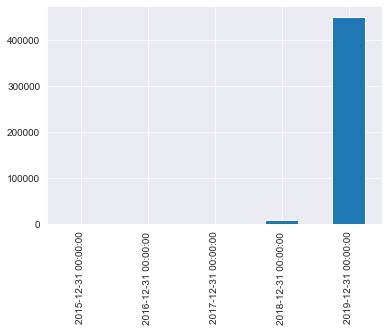

In [7]:
# Plot Crime Frequency by Date 

# Create a subset dataframe by combining columns
date_boro_df = df[['DATE', 'BOROUGH']]

# Count the sum of occurences for each date
dates = date_boro_df.DATE.value_counts()

# # Use resample to organize it into Yearly sums
count = dates.resample(rule='Y').apply('sum')
count

# #Plot 
count.plot(kind='bar')

There are fewer recorded crimes from 2015 to 2018 because NYC OpenData and NYPD Database did not merge until 2017. Because of this, there are way fewer data in those years that it will make our graphs different since it will consider years 2015 to 2018 as outliers of 2019.

## For better data, we will now focus only on crime records in 2019.

### Filter only 2019 dates from `df`

In [8]:
df = df[df['DATE'].dt.year == 2019]
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,OFFENSE LEVEL,PREM_TYP_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
0,314773184,48,BRONX,2019-12-31,18:00:00,COMPLETED,FELONY,STREET,ROBBERY,UNKNOWN,...,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)",2019,12,31
1,289837961,25,MANHATTAN,2019-12-30,20:30:00,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,PETIT LARCENY,UNKNOWN,...,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)",2019,12,30
2,535744284,77,BROOKLYN,2019-12-24,16:55:00,COMPLETED,FELONY,STREET,FELONY ASSAULT,UNKNOWN,...,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)",2019,12,24
3,895678119,52,BRONX,2019-12-30,19:32:00,COMPLETED,MISDEMEANOR,CHAIN STORE,PETIT LARCENY,25-44,...,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)",2019,12,30
4,299841674,18,MANHATTAN,2019-12-30,15:30:00,COMPLETED,MISDEMEANOR,STREET,PETIT LARCENY,UNKNOWN,...,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)",2019,12,30


## Group similar crime types into one category
Here we show every offense name occuring in the data. 

In [9]:
# Get a list of all the different crime types
def get_all_crime_types():
    result = []
    for key in df.OFFENSE_NAME.tolist():
        if key not in result:
            result.append(key)
    return result
get_all_crime_types()

['ROBBERY',
 'PETIT LARCENY',
 'FELONY ASSAULT',
 'ASSAULT 3 & RELATED OFFENSES',
 'SEX CRIMES',
 'HARRASSMENT 2',
 'GRAND LARCENY',
 'THEFT-FRAUD',
 'BURGLARY',
 'INTOXICATED & IMPAIRED DRIVING',
 'VEHICLE AND TRAFFIC LAWS',
 'FORGERY',
 'DANGEROUS WEAPONS',
 'RAPE',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'DANGEROUS DRUGS',
 'MURDER & NON-NEGL. MANSLAUGHTER',
 'KIDNAPPING',
 'CRIMINAL MISCHIEF & RELATED OF',
 'MISCELLANEOUS PENAL LAW',
 'FRAUDS',
 'POSSESSION OF STOLEN PROPERTY',
 'CRIMINAL TRESPASS',
 'ARSON',
 'OFFENSES INVOLVING FRAUD',
 'OFFENSES AGAINST PUBLIC ADMINI',
 'ADMINISTRATIVE CODE',
 'UNAUTHORIZED USE OF A VEHICLE',
 'GAMBLING',
 'OFF. AGNST PUB ORD SENSBLTY &',
 'NYS LAWS-UNCLASSIFIED FELONY',
 nan,
 'OFFENSES AGAINST THE PERSON',
 'THEFT OF SERVICES',
 'KIDNAPPING & RELATED OFFENSES',
 'OTHER OFFENSES RELATED TO THEF',
 "BURGLAR'S TOOLS",
 'ESCAPE 3',
 'ENDAN WELFARE INCOMP',
 'FRAUDULENT ACCOSTING',
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
 'OTHER STATE LAWS (NON PENAL 

Many offenses are similar but have different names, such as "GRAND LARCENY OF MOTOR VEHICLE" and "GRAND LARCENY" so we will combine all similar offense names into one name.  

In [10]:
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)
df[df['OFFENSE_NAME'].str.contains("LARCENY")]

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,OFFENSE LEVEL,PREM_TYP_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
1,289837961,25,MANHATTAN,2019-12-30,20:30:00,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,PETIT LARCENY,UNKNOWN,...,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)",2019,12,30
3,895678119,52,BRONX,2019-12-30,19:32:00,COMPLETED,MISDEMEANOR,CHAIN STORE,PETIT LARCENY,25-44,...,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)",2019,12,30
4,299841674,18,MANHATTAN,2019-12-30,15:30:00,COMPLETED,MISDEMEANOR,STREET,PETIT LARCENY,UNKNOWN,...,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)",2019,12,30
5,136697381,94,BROOKLYN,2019-12-28,13:00:00,COMPLETED,MISDEMEANOR,STREET,PETIT LARCENY,UNKNOWN,...,UNKNOWN,D,997964,205703,40.731281,-73.950519,"(40.73128148300003, -73.95051933399996)",2019,12,28
11,754294853,19,MANHATTAN,2019-12-28,11:30:00,COMPLETED,FELONY,CHAIN STORE,GRAND LARCENY,UNKNOWN,...,UNKNOWN,D,993570,216847,40.761875,-73.966358,"(40.76187469000007, -73.96635808399996)",2019,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460733,833559434,109,QUEENS,2019-01-02,19:00:00,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,PETIT LARCENY,UNKNOWN,...,WHITE,M,1040669,219194,40.768141,-73.796321,"(40.76814148300008, -73.79632062599995)",2019,1,2
460735,912917376,6,MANHATTAN,2019-01-04,10:10:00,COMPLETED,FELONY,STREET,GRAND LARCENY,UNKNOWN,...,WHITE,M,984728,207199,40.735398,-73.998277,"(40.73539825200004, -73.99827664799993)",2019,1,4
460737,153186437,28,MANHATTAN,2019-01-05,19:30:00,COMPLETED,MISDEMEANOR,FOOD SUPERMARKET,PETIT LARCENY,UNKNOWN,...,UNKNOWN,D,998954,233791,40.808374,-73.946886,"(40.80837413600005, -73.94688582299993)",2019,1,5
460739,352845293,9,MANHATTAN,2019-01-04,3:30:00,COMPLETED,FELONY,BAR/NIGHT CLUB,GRAND LARCENY,UNKNOWN,...,BLACK,F,988631,204190,40.727138,-73.984195,"(40.72713821200006, -73.98419514299998)",2019,1,4


In [11]:
# Create arrays to categorize crimes into 20 categories
crime_types = {
    "SEX CRIMES": "SEX_CRIMES",
    "RAPE": "SEX_CRIMES",
    "FELONY SEX CRIMES": "SEX_CRIMES",
    
    "HARRASSMENT 2": "HARRASSMENT",
    "JOSTLING": "HARRASSMENT",
    "FRAUDULENT ACCOSTING": "HARRASSMENT",
    
    "FELONY ASSAULT": "ASSAULT",
    "ASSAULT 3 & RELATED OFFENSES": "ASSAULT",
    
    "OTHER OFFENSES RELATED TO THEF": "THEFT",
    "THEFT OF SERVICES": "THEFT",
    "POSSESSION OF STOLEN PROPERTY": "THEFT",
    
    "OFF. AGNST PUB ORD SENSBLTY &": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "OFFENSES AGAINST PUBLIC ADMINI": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "OFFENSES AGAINST THE PERSON": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "POSSESSION OF STOLEN PROPERT": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "DISORDERLY CONDUCT": "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES RELATED TO CHILDREN': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'FRAUDULENT ACCOSTING': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'ENDAN WELFARE INCOMP': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'DISRUPTION OF A RELIGIOUS SERV': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES AGAINST MARRIAGE UNCL': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'CRIMINAL TRESPASS': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES AGAINST PUBLIC SAFETY': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'DISRUPTION OF A RELIGIOUS SERV': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'CRIMINAL MISCHIEF & RELATED OF': "OFFENSES_AGAINST_PUBLIC_ORDER",
    "ALCOHOLIC BEVERAGE CONTROL LAW": "OFFENSES_AGAINST_PUBLIC_ORDER",
    
    'DANGEROUS DRUGS': "POSSESSION_CONTROLLED_SUBSSTANCE",
    
    "DANGEROUS WEAPONS": "POSSESSION_WEAPON",
    "UNLAWFUL POSS. WEAP. ON SCHOOL": "POSSESSION_WEAPON",
    
    "VEHICLE AND TRAFFIC LAWS": "TRAFFIC_LAWS_VIOLATION",
    "UNAUTHORIZED USE OF A VEHICLE": "POSSESSION_WEAPON",
    "OTHER TRAFFIC INFRACTION": "POSSESSION_WEAPON",
    
    "FORGERY": "FRAUD",
    
    "INTOXICATED & IMPAIRED DRIVING": "DRIVING_UNDER_INFLUENCE",
    "INTOXICATED/IMPAIRED DRIVING": "DRIVING_UNDER_INFLUENCE",
    "DRIVING_UNDER_INFLUENCE": "DRIVING_UNDER_INFLUENCE",
    
    "MURDER & NON-NEGL. MANSLAUGHTER": "MURDER",
    
    "ROBBERY": "ROBBERY",
    
    "KIDNAPPING": "KIDNAPPING",
    "KIDNAPPING & RELATED OFFENSES": "KIDNAPPING",
    "KIDNAPPING AND RELATED OFFENSES": "KIDNAPPING",
    
    "BURGLARY": "BURGLARY",
    "CRIMINAL TRESPASS": "BURGLARY",
    "BURGLAR'S TOOLS": "BURGLARY",
    
    "PETIT LARCENY": "LARCENY",
    "GRAND LARCENY": "LARCENY",
    "GRAND LARCENY OF MOTOR VEHICLE": "LARCENY",
    "PETIT LARCENY OF MOTOR VEHICLE": "LARCENY",
    
    "FRAUDS": "FRAUD",
    "THEFT-FRAUD": "FRAUD",
    "OFFENSES INVOLVING FRAUD": "FRAUD",
    "FRAUDULENT ACCOSTING": "FRAUD",
    
    "NYS LAWS-UNCLASSIFIED FELONY": "UNCLASSIFIED",
    "NYS LAWS-UNCLASSIFIED VIOLATION": "UNCLASSIFIED",
    "ESCAPE 3": "UNCLASSIFIED",
    "OTHER STATE LAWS (NON PENAL LA": "UNCLASSIFIED",
    "UNKNOWN": "UNCLASSIFIED",
    "OTHER STATE LAWS (NON PENAL LAW)": "UNCLASSIFIED",
    "OTHER STATE LAWS": "UNCLASSIFIED",
    "ANTICIPATORY OFFENSES": "UNCLASSIFIED",
    "ADMINISTRATIVE CODE": "UNCLASSIFIED",
    
    "MISCELLANEOUS PENAL LAW": "MISC_PENAL_LAW",
    
    "ARSON": "ARSON",
    
    "GAMBLING": "GAMBLING",
    "LOITERING/GAMBLING (CARDS, DIC": "GAMBLING",
    
    "HOMICIDE-NEGLIGENT-VEHICLE": "MURDER",
    "HOMICIDE-NEGLIGENT,UNCLASSIFIE": "MURDER",
    "HOMICIDE": "MURDER",
    
    "AGRICULTURE & MRKTS LAW-UNCLASSIFIED": "SOCIAL_RELATED_CRIMES",
    "PROSTITUTION & RELATED OFFENSES": "SOCIAL_RELATED_CRIMES",
    "OFFENSES RELATED TO CHILDREN": "SOCIAL_RELATED_CRIMES",
    "DISORDERLY CONDUCT": "SOCIAL_RELATED_CRIMES",
    "AGRICULTURE & MRKTS LAW-UNCLASSIFIED": "SOCIAL_RELATED_CRIMES",
    "CHILD ABANDONMENT/NON SUPPORT": "SOCIAL_RELATED_CRIMES",
}


In [12]:
# Fill NaN values with "UNKNOWN"
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)

# Create a new column CRIME_TYPE to contain the offense type gropu
# From https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
df['CRIME_TYPE'] = df['OFFENSE_NAME'].map(crime_types).fillna(df['OFFENSE_NAME'])

We can see that many offense names containig "ASSAULT" have been grouped together into one offense name called "ASSAULT", and the same has been done for the other similar named offense names. Now that we have combined similar offense names, let's see which crimes were the most frequent.

In [13]:
print(len(df.CRIME_TYPE.value_counts()))
df.CRIME_TYPE.value_counts()


20


LARCENY                             134122
OFFENSES_AGAINST_PUBLIC_ORDER        74031
ASSAULT                              73102
HARRASSMENT                          71000
MISC_PENAL_LAW                       14048
BURGLARY                             13973
POSSESSION_CONTROLLED_SUBSSTANCE     13367
ROBBERY                              13325
FRAUD                                10876
POSSESSION_WEAPON                     7791
SEX_CRIMES                            7535
TRAFFIC_LAWS_VIOLATION                6740
DRIVING_UNDER_INFLUENCE               4366
THEFT                                 3053
UNCLASSIFIED                          1969
ARSON                                  675
MURDER                                 303
GAMBLING                               289
SOCIAL_RELATED_CRIMES                  287
KIDNAPPING                             126
Name: CRIME_TYPE, dtype: int64

In [14]:
df['CRIME_TYPE'].value_counts(normalize=True) * 100

LARCENY                             29.740253
OFFENSES_AGAINST_PUBLIC_ORDER       16.415657
ASSAULT                             16.209660
HARRASSMENT                         15.743562
MISC_PENAL_LAW                       3.115008
BURGLARY                             3.098377
POSSESSION_CONTROLLED_SUBSSTANCE     2.964003
ROBBERY                              2.954690
FRAUD                                2.411648
POSSESSION_WEAPON                    1.727579
SEX_CRIMES                           1.670813
TRAFFIC_LAWS_VIOLATION               1.494530
DRIVING_UNDER_INFLUENCE              0.968118
THEFT                                0.676973
UNCLASSIFIED                         0.436607
ARSON                                0.149675
MURDER                               0.067187
GAMBLING                             0.064083
SOCIAL_RELATED_CRIMES                0.063639
KIDNAPPING                           0.027939
Name: CRIME_TYPE, dtype: float64

In [15]:
df.to_csv('./data/final_NYC_crimes.csv', index=False)